In [1]:
import pandas as pd
train_df = pd.read_excel("..\Preprocessing\df_train_fix.xlsx")
test_df = pd.read_excel("..\Preprocessing\df_test_fix.xlsx")

In [2]:
test_df = test_df[test_df['translated'].notna()]
test_df = test_df[test_df['Label (1,0,-1)'].notna()]
test_df

,Unnamed: 0,comments,bank,platform,"Label (1,0,-1)",text_cleaned,review_text_cleaned,emoji,Data,tokenized,length_of_review,translated
0,0,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌 #BRIm...,BRI,Instagram,1,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌,has emoji,jawabannya logo brimo yang muncul [smiling fac...,"['jawabannya', 'logo', 'brimo', 'yang', 'muncu...",12,jawabannya logo brimo yang muncul wajah terse...
1,1,@sudrajaddwntr @alibyulian @neidijrssyh @dhemm...,BCA,Instagram,1,.j siap siap war tiket pasang reminders dr ...,.j siap siap war tiket pasang reminders dari s...,has emoji,siap siap war tiket pasang reminders dari sek...,"['siap', 'siap', 'war', 'tiket', 'pasang', 're...",20,siap siap perang tiket pasang pengingat dari ...
2,2,Lancar dan lancar semoga bukan cerita lagi,BCA,YouTube,1,Lancar dan lancar semoga bukan cerita lagi,Lancar dan lancar semoga bukan cerita lagi,no emoji,lancar dan lancar semoga bukan cerita lagi,"['lancar', 'dan', 'lancar', 'semoga', 'bukan',...",7,lancar dan lancar semoga bukan cerita lagi
3,3,Bismillaaaaah,BCA,Instagram,1,Bismillaaaaah,Bismillaaaaah,no emoji,bismillaaaaah,['bismillaaaaah'],1,bismillaaaaah
4,4,@JeniusConnect Paypal bisa gak?,Bank BTPN,Instagram,0,Paypal bisa gak?,Paypal bisa gak?,no emoji,paypal bisa gak,"['paypal', 'bisa', 'gak']",3,paypal bisa gak
...,...,...,...,...,...,...,...,...,...,...,...,...
8341,8341,@JeniusConnect @jeniushelp Unlinknya dipercepa...,Bank BTPN,Instagram,0,Unlinknya dipercepat dong,Unlinknya dipercepat dong,no emoji,unlinknya dipercepat dong,"['unlinknya', 'dipercepat', 'dong']",3,unlinknya dipercepat dong
8342,8342,Kalo bca prioritas dpt fasilitas apa nih😁,BCA,Instagram,1,Kalo bca prioritas dpt fasilitas apa nih😁,Kalo bca prioritas dapat fasilitas apa nih😁,has emoji,kalo bca prioritas dapat fasilitas apa nih [be...,"['kalo', 'bca', 'prioritas', 'dapat', 'fasilit...",12,kalo bca prioritas dapat fasilitas apa nih wa...
8343,8343,GILA SIHHH AYAANG AKUUU😍😍,Allo Bank,Instagram,1,GILA SIHHH AYAANG AKUUU😍😍,GILA SIHHH AYAANG AKUUU😍😍,no emoji,gila sihhh ayaang akuuu [smiling face with hea...,"['gila', 'sihhh', 'ayaang', 'akuuu', '[smiling...",14,gila sihhh ayaang akuuu wajah tersenyum denga...
8344,8344,SEMANGATTTTTT!!!!,Bank Mega,Twitter,1,SEMANGATTTTTT!!!!,SEMANGATTTTTT!!!!,no emoji,semangatttttt,['semangatttttt'],1,semangatttttt


In [3]:
combined_df = pd.concat([train_df, test_df])

# Reset the index if needed
combined_df.reset_index(drop=True, inplace=True)

In [4]:
combined_df = combined_df.dropna(subset=['review_text_cleaned'])
combined_df.reset_index(drop=True,inplace=True)

In [5]:
from nltk.corpus import stopwords
additional_stop = ['nya','yg','ga','gk','tp','nih','noh','lah','dong','pa','yuk','gak','ya','sih','yaa','aja', 'min', 'bca','brimo','biar','kak','blu','mega','allo','bank','bca','btn']
all_stopwords = stopwords.words('indonesian') + additional_stop

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X=combined_df['translated']
y=combined_df['Label (1,0,-1)']
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.20,random_state=30)

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
training_ratings = le.fit_transform(y_train)
val_ratings = le.transform(y_test)

In [13]:
val_ratings

array([1, 2, 0, ..., 2, 2, 1], dtype=int64)

In [14]:
vocab_size = 10000
embedding_dim = 64
max_length = 15
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

In [16]:
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'wajah': 2,
 'dengan': 3,
 'bank': 4,
 'hati': 5,
 'dan': 6,
 'tidak': 7,
 'yang': 8,
 'mata': 9,
 'ada': 10}

In [17]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[10])

[177, 39, 261, 31, 192, 2207, 526, 192, 48, 1759, 65, 7, 210, 286, 93, 59, 771, 526, 83, 26, 86, 248, 6, 418]


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

2
15
17
15
24
15


In [19]:
validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

8295
(8295, 15)


In [20]:
import numpy as np
training_label_seq = np.array(y_train)
validation_label_seq = np.array(y_test)

In [21]:
np.shape(X_train)

(33176,)

In [22]:
from tensorflow import keras
import tensorflow as tf

def baseline_model():
  input_ = keras.layers.Input(1)
  embedding = keras.layers.Embedding(vocab_size, embedding_dim)(input_)
  bidirectional = keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim))(embedding)
  hidden1 = keras.layers.Dense(embedding_dim, activation='relu')(bidirectional)
  output = keras.layers.Dense(3, activation='softmax')(hidden1)
  model = keras.models.Model(inputs=[input_], outputs=[output])

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [23]:
baseline_model = baseline_model()
baseline_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 embedding (Embedding)       (None, 1, 64)             640000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 714499 (2.73 MB)
Trainable params: 714499 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________

In [24]:
num_epochs = 10
history = baseline_model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), batch_size=128)

Epoch 1/10
260/260 [==============================] - 9s 22ms/step - loss: 0.6664 - accuracy: 0.6977 - val_loss: 0.5687 - val_accuracy: 0.7515
Epoch 2/10
260/260 [==============================] - 5s 19ms/step - loss: 0.4870 - accuracy: 0.7933 - val_loss: 0.5744 - val_accuracy: 0.7519
Epoch 3/10
260/260 [==============================] - 5s 19ms/step - loss: 0.4279 - accuracy: 0.8238 - val_loss: 0.5830 - val_accuracy: 0.7562
Epoch 4/10
260/260 [==============================] - 5s 18ms/step - loss: 0.3795 - accuracy: 0.8441 - val_loss: 0.6138 - val_accuracy: 0.7462
Epoch 5/10
260/260 [==============================] - 5s 18ms/step - loss: 0.3357 - accuracy: 0.8617 - val_loss: 0.6632 - val_accuracy: 0.7491
Epoch 6/10
260/260 [==============================] - 5s 18ms/step - loss: 0.2973 - accuracy: 0.8766 - val_loss: 0.7245 - val_accuracy: 0.7447
Epoch 7/10
260/260 [==============================] - 5s 18ms/step - loss: 0.2648 - accuracy: 0.8868 - val_loss: 0.8039 - val_accuracy: 0.7395

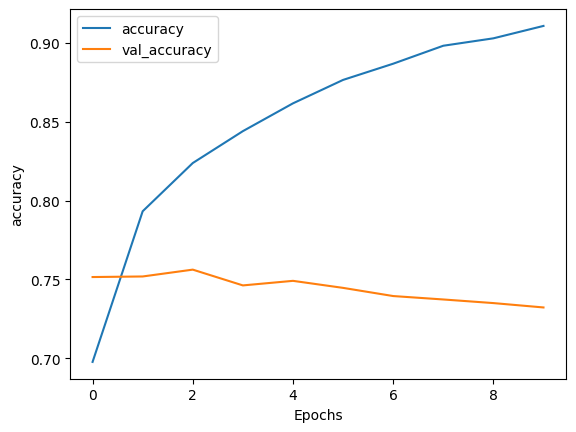

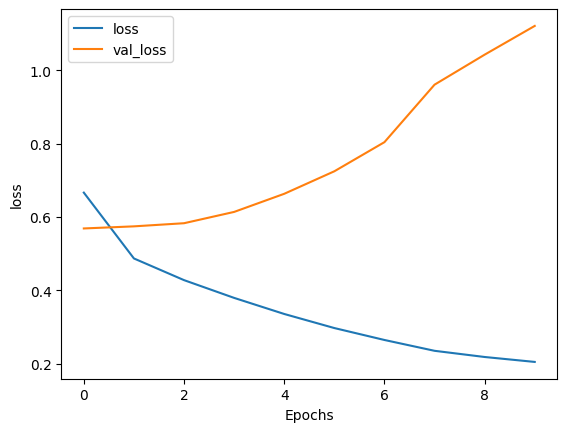

In [25]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [26]:
import tensorflow as tf
vocab_size = 10000
embedding_dim = 64
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = ''

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(128, embedding_dim, input_length=max_length, mask_zero=True),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
  tf.keras.layers.Dense(16,kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),bias_regularizer = tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.LeakyReLU(alpha=0.3),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(16, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),
                        bias_regularizer  = tf.keras.regularizers.l2(0.01),
                        activation='elu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(8, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),
                        activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
  ])


opt = tf.keras.optimizers.Nadam(lr=0.0001, clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [27]:
import tensorflow as tf
vocab_size = 10000
embedding_dim = 64
max_length = 15
trunc_type = 'post'
padding_type = 'post'
oov_tok = ''
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, mask_zero=True),  # Updated vocab_size
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
  tf.keras.layers.Dense(16, kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.1), bias_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.LeakyReLU(alpha=0.3),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(16, kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.1),
                        bias_regularizer=tf.keras.regularizers.l2(0.01),
                        activation='elu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(8, kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.1),
                        activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])
opt = tf.keras.optimizers.Nadam(lr=0.0001, clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [28]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
checkpoint_filepath = './checkpoint_model'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), batch_size=100, callbacks=[callback, reduce_lr, model_checkpoint])

Epoch 1/30
332/332 [==============================] - 29s 42ms/step - loss: 4.6964 - accuracy: 0.6089 - val_loss: 2.3145 - val_accuracy: 0.6423 - lr: 0.0010
Epoch 2/30
332/332 [==============================] - 9s 28ms/step - loss: 1.3324 - accuracy: 0.7018 - val_loss: 0.9415 - val_accuracy: 0.7055 - lr: 0.0010
Epoch 3/30
332/332 [==============================] - 10s 31ms/step - loss: 0.7108 - accuracy: 0.7575 - val_loss: 0.6583 - val_accuracy: 0.7536 - lr: 0.0010
Epoch 4/30
332/332 [==============================] - 10s 29ms/step - loss: 0.5552 - accuracy: 0.8012 - val_loss: 0.6327 - val_accuracy: 0.7525 - lr: 0.0010
Epoch 5/30
332/332 [==============================] - 10s 29ms/step - loss: 0.4988 - accuracy: 0.8277 - val_loss: 0.6385 - val_accuracy: 0.7494 - lr: 0.0010
Epoch 5: early stopping


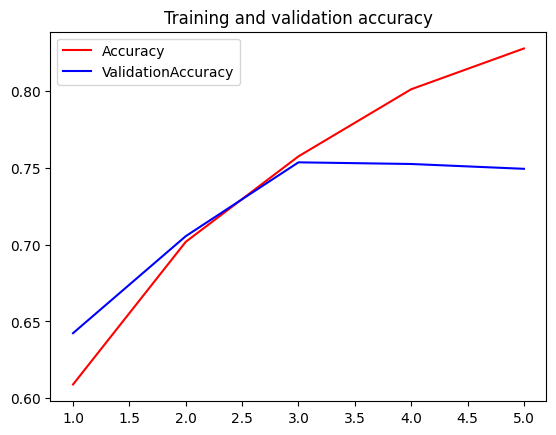

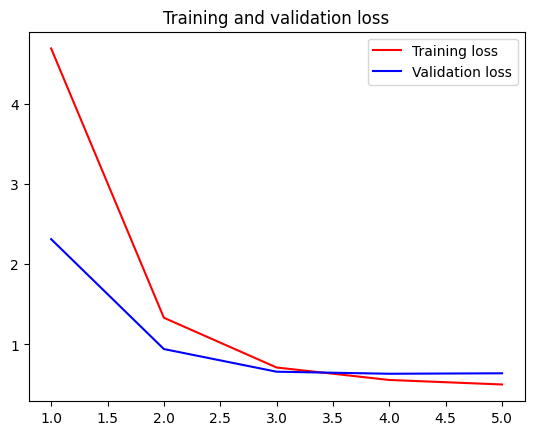

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Accuracy')
plt.plot(epochs, val_acc, 'blue', label='ValidationAccuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers import Embedding

EMBEDDING_DIM = 100

print('Build model...')

model_gru = Sequential()
model_gru.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model_gru.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dense(3, activation='softmax'))

# try using different optimizers and different optimizer configs
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model_gru.summary())

Build model...
Summary of the built model...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 15, 100)           1000000   
                                                                 
 gru (GRU)                   (None, 32)                12864     
                                                                 
 dense_10 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1012963 (3.86 MB)
Trainable params: 1012963 (3.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=1)
tf.config.experimental_run_functions_eagerly(True)
print('Train...')
# labels = tf.reshape(training_label_seq, [-1])
# val_labels = tf.reshape(validation_label_seq, [-1])
num_classes = 3  # Replace 3 with the number of classes in your problem
labels = tf.one_hot(training_label_seq, depth=num_classes)
val_labels = tf.one_hot(validation_label_seq, depth=num_classes)
gru = model_gru.fit(train_padded, labels, batch_size=128, epochs=25, validation_data=(validation_padded, val_labels), verbose=2,callbacks=[callback, reduce_lr, model_checkpoint]) 

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


Train...
Epoch 1/25


c:\Users\jmspa\anaconda3\envs\coba_GRU\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


260/260 - 86s - loss: 0.4754 - accuracy: 0.6410 - val_loss: 0.3904 - val_accuracy: 0.7144 - lr: 0.0010 - 86s/epoch - 329ms/step
Epoch 2/25
260/260 - 85s - loss: 0.3489 - accuracy: 0.7597 - val_loss: 0.3439 - val_accuracy: 0.7567 - lr: 0.0010 - 85s/epoch - 326ms/step
Epoch 3/25
260/260 - 84s - loss: 0.2987 - accuracy: 0.8027 - val_loss: 0.3426 - val_accuracy: 0.7600 - lr: 0.0010 - 84s/epoch - 323ms/step
Epoch 4/25
260/260 - 85s - loss: 0.2669 - accuracy: 0.8274 - val_loss: 0.3533 - val_accuracy: 0.7588 - lr: 0.0010 - 85s/epoch - 326ms/step
Epoch 4: early stopping


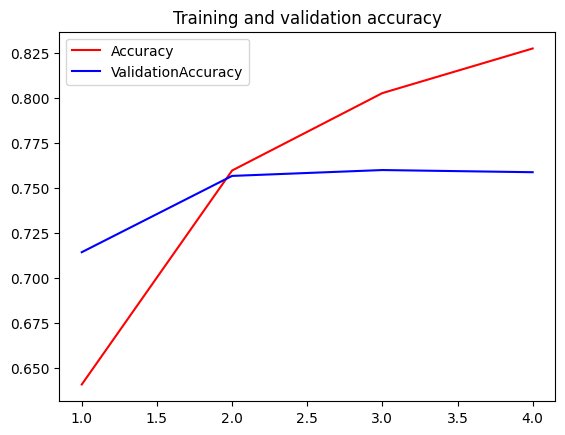

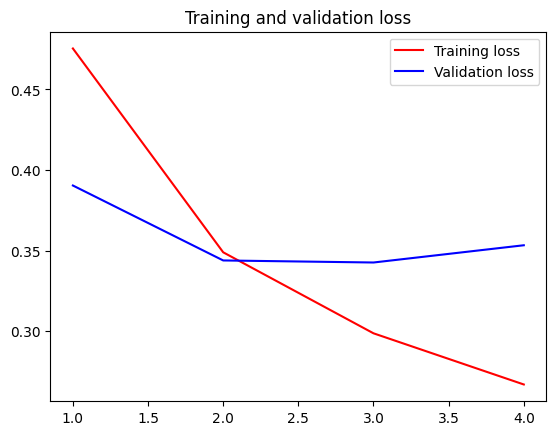

In [32]:
loss_gru = gru.history['loss']
val_loss_gru = gru.history['val_loss']
acc_gru = gru.history['accuracy']
val_acc_gru = gru.history['val_accuracy']
epochs_gru = range(1, len(acc_gru) + 1)
plt.figure()
plt.title('Training and validation accuracy')
plt.plot(epochs_gru, acc_gru, 'red', label='Accuracy')
plt.plot(epochs_gru, val_acc_gru, 'blue', label='ValidationAccuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs_gru, loss_gru, 'red', label='Training loss')
plt.plot(epochs_gru, val_loss_gru, 'blue', label='Validation loss')
plt.legend()

plt.show()